In [1]:
from keras.datasets import mnist

# MNISTデータのロード
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


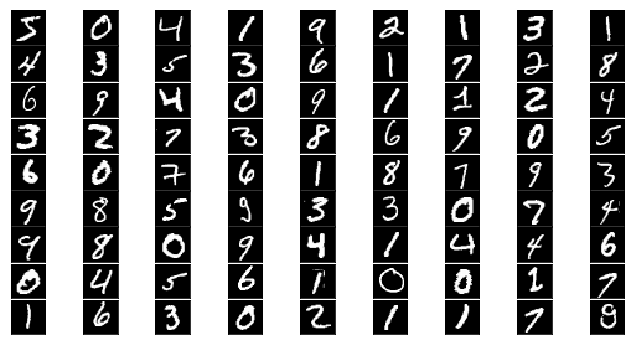

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

#MNISTデータの表示
fig = plt.figure(figsize=(9, 9))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)
for i in range(81):
    ax = fig.add_subplot(9, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i].reshape((28, 28)), cmap='gray')

In [3]:
from keras.utils import np_utils
nb_classes = 10

# 画像を1次元配列化
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# 画素を0.0-1.0の範囲に変換
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# one-hot-encoding
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

(60000, 'train samples')
(10000, 'test samples')


In [4]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

model = Sequential()

#最初の層では入力の形(今回は,784)を指定する．以降の層では不要
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [6]:
from keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [7]:
batch_size = 128
epochs = 20
history = model.fit(x_train, Y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            validation_split=0.1,
                            verbose=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 2s - loss: 0.2354 - acc: 0.9321 - val_loss: 0.0911 - val_acc: 0.9730
Epoch 2/20
54000/54000 [==============================] - 1s - loss: 0.0843 - acc: 0.9741 - val_loss: 0.0756 - val_acc: 0.9782
Epoch 3/20
54000/54000 [==============================] - 1s - loss: 0.0542 - acc: 0.9827 - val_loss: 0.0676 - val_acc: 0.9807
Epoch 4/20
54000/54000 [==============================] - 1s - loss: 0.0359 - acc: 0.9886 - val_loss: 0.0671 - val_acc: 0.9818
Epoch 5/20
54000/54000 [==============================] - 1s - loss: 0.0249 - acc: 0.9919 - val_loss: 0.0793 - val_acc: 0.9772
Epoch 6/20
54000/54000 [==============================] - 1s - loss: 0.0227 - acc: 0.9929 - val_loss: 0.0780 - val_acc: 0.9773
Epoch 7/20
54000/54000 [==============================] - 1s - loss: 0.0206 - acc: 0.9929 - val_loss: 0.0778 - val_acc: 0.9815
Epoch 8/20
54000/54000 [==============================] - 1s -

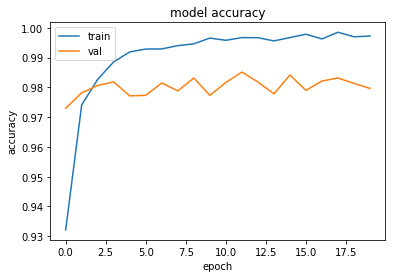

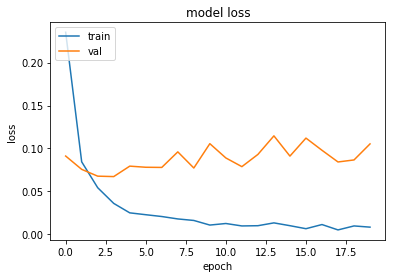

In [8]:
#正答率
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [9]:
_, acc = model.evaluate(x_test, Y_test, verbose=0)
print('accuracy: {}'.format(acc))

accuracy: 0.9804


In [10]:
from sklearn.metrics import classification_report, confusion_matrix

labels_pred = model.predict_classes(x_test, verbose=0)

print(confusion_matrix(y_test, labels_pred))
print(classification_report(y_test, labels_pred))



[[ 972    1    1    1    1    2    0    0    0    2]
 [   0 1122    2    1    0    3    6    0    1    0]
 [   2    0 1012    5    1    0    2    6    4    0]
 [   0    0    3  994    0    4    0    2    3    4]
 [   0    1    3    1  963    1    4    1    0    8]
 [   3    0    0   10    1  872    3    0    1    2]
 [   3    2    0    1    5    3  942    0    1    1]
 [   2    4    6    6    0    1    0 1006    0    3]
 [   2    1    3    9    6    2    2    5  939    5]
 [   1    2    0    5   11    5    0    3    0  982]]
             precision    recall  f1-score   support

          0       0.99      0.99      0.99       980
          1       0.99      0.99      0.99      1135
          2       0.98      0.98      0.98      1032
          3       0.96      0.98      0.97      1010
          4       0.97      0.98      0.98       982
          5       0.98      0.98      0.98       892
          6       0.98      0.98      0.98       958
          7       0.98      0.98      0.98  